In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/delhi_edit_var/Cleaned Data.csv')
df.set_index('time',inplace = True)

In [ ]:
df.head()

,PM2.5,PM10,tp,Surface Pressure,U component,V component,2m Temperature,Boundary Layer Height,RH_2m,wind speed
time,,,,,,,,,,
2017-01-01 06:00:00,230.590000,312.448,9.313226e-10,98781.468750,-1.698970,0.931966,283.674408,54.365234,99.624489,1.937798
2017-01-01 07:00:00,215.407143,305.528,9.313226e-10,98797.789062,-1.695413,0.854788,283.600372,52.895996,99.611855,1.898707
2017-01-01 08:00:00,208.804286,377.872,9.313226e-10,98880.539062,-1.640148,0.604416,283.655914,51.344971,99.773270,1.747971
2017-01-01 09:00:00,253.340000,465.616,9.313226e-10,98962.203125,-1.820445,0.612526,284.214569,95.833008,98.974228,1.920731
2017-01-01 10:00:00,242.278571,349.940,9.313226e-10,99041.390625,-1.943013,0.698861,285.087982,221.705322,93.935646,2.064875


In [ ]:
#@title Separate Winter Time
winter_2017 = df.loc['2017-10-01 00:00:00':'2018-02-28 23:00:00']
winter_2018 = df.loc['2018-10-01 00:00:00':'2019-02-28 23:00:00']
winter_2019 = df.loc['2019-10-01 00:00:00':'2020-02-29 23:00:00']
winter_2020 = df.loc['2020-10-01 00:00:00':'2021-02-28 23:00:00']
winter_2021 = df.loc['2021-10-01 00:00:00':'2022-02-28 23:00:00']

In [ ]:
#@title Supervised Split
def supervised_split(df,i=1,lag = 24):
  df_as_np = df.iloc[:,i].to_numpy()
  X,Y = [],[]
  for i in range(len(df_as_np)-lag):
    X.append(df_as_np[i:i+lag])
    Y.append(df_as_np[i+lag])
  return np.array(X), np.array(Y)

In [ ]:
i = 9
X_2017,y_2017 = supervised_split(winter_2017,i)
X_2018,y_2018 = supervised_split(winter_2018,i)
X_2019,y_2019 = supervised_split(winter_2019,i)

X_val,y_val =   supervised_split(winter_2020,i)
X_test,y_test = supervised_split(winter_2021,i)
X_train,y_train = np.concatenate([X_2017,X_2018,X_2019],axis = 0),np.concatenate([y_2017,y_2018,y_2019],axis = 0)

In [ ]:
#@title XGBoost Model
reg = xgb.XGBRegressor(n_estimators=1000,objective='reg:squarederror')
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        early_stopping_rounds=None,
        verbose=False)
reg.score(X_test,y_test)

0.8796903338772714

In [ ]:
#@title Multi-Step Predictions
def multistep_prediction(i=0):
    ## Multi Step Predictions ##
    multistep_predictions = []
    last_x = X_test[i]
    while len(multistep_predictions)<len(last_x)/4:
        p = reg.predict(last_x.reshape(1,-1))[0]
        # Update the Prediction List
        multistep_predictions.append(p)
        # Make the New Input
        last_x = np.roll(last_x,-1)
        last_x[-1] = p
    # a = pd.DataFrame(data = {'Actuals':y_test[i:i+6],'Predictions': multistep_predictions})
    return multistep_predictions

In [ ]:
rh_predictions = [multistep_prediction(i) for i in range(len(X_test))]
with open('/content/drive/MyDrive/Numpy files/ws.npy','wb') as f:
  np.save(f,np.array(rh_predictions))

In [ ]:
import os 
base_path = '/content/drive/MyDrive/Numpy files/'
files = os.listdir(base_path)[1:]
np_req = []
for i in files:
  with open(f'/content/drive/MyDrive/Numpy files/{i}','rb') as f:
    a = np.load(f)
    np_req.append(a)

In [ ]:
pm10  = np_req[0]
tp    = np_req[1]
sp    = np_req[2]
u     = np_req[3]
v     = np_req[4]
temp  = np_req[5]
blh   = np_req[6]
rh    = np_req[7]
ws    = np_req[8]

In [ ]:
def pred(i):
  df_new = pd.DataFrame(data = np.stack([pm10[:,i],tp[:,i],sp[:,i],u[:,i],v[:,i],temp[:,i],blh[:,i],rh[:,i],ws[:,i]],axis = 1)
   , columns= X_train_reg.columns)
  return df_new

In [ ]:
first_hour = pred(0)

# XGBOOST Normal Regression Model





In [ ]:
df = pd.read_csv('/content/drive/MyDrive/delhi_edit_var/Cleaned Data.csv')
df.set_index('time',inplace = True)

In [ ]:
winter_2017 = df.loc['2017-10-01 00:00:00':'2018-02-28 23:00:00']
winter_2018 = df.loc['2018-10-01 00:00:00':'2019-02-28 23:00:00']
winter_2019 = df.loc['2019-10-01 00:00:00':'2020-02-29 23:00:00']
winter_2020 = df.loc['2020-10-01 00:00:00':'2021-02-28 23:00:00']
winter_2021 = df.loc['2021-10-01 00:00:00':'2022-02-28 23:00:00']

## Train Test Split

In [ ]:
train_data_reg = pd.concat([winter_2017,winter_2018,winter_2019],axis=0)
X_train_reg,y_train_reg = train_data_reg.drop(columns=['PM2.5']),train_data_reg['PM2.5']
X_val_reg,y_val_reg   = winter_2020.drop(columns=['PM2.5']),winter_2020['PM2.5']
X_test_reg,y_test_reg = winter_2021.drop(columns=['PM2.5']),winter_2021['PM2.5']

In [ ]:
model = xgb.XGBRegressor(n_estimators=1000,objective = 'reg:squarederror')
model.fit(X_train_reg, y_train_reg,
        eval_set=[(X_train_reg, y_train_reg), (X_val_reg, y_val_reg)],
        early_stopping_rounds=None,
       verbose=False)

XGBRegressor(n_estimators=1000, objective='reg:squarederror')

In [ ]:
model.score(X_test_reg,y_test_reg)

0.9399245330324947

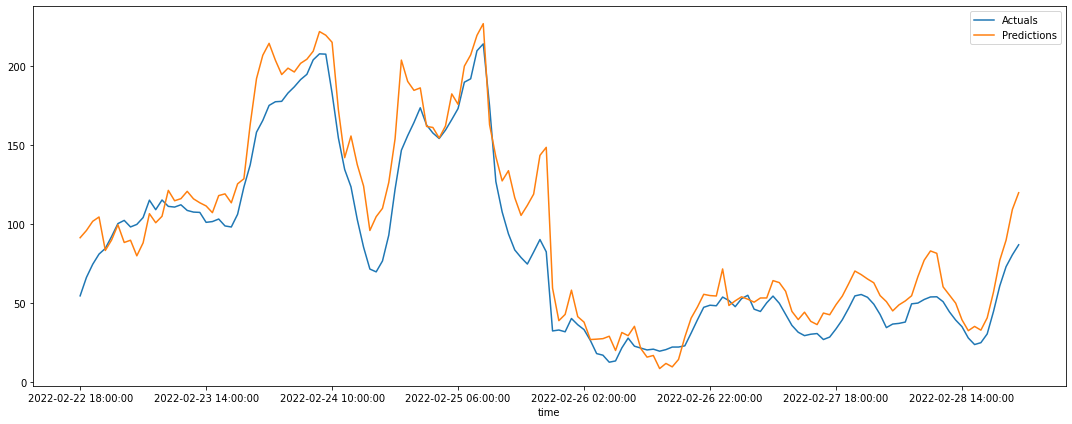

In [ ]:
pd.DataFrame({'Actuals':y_test_reg,'Predictions':model.predict(X_test_reg)})[-150:].plot(figsize = (15,6))
plt.tight_layout()

## Save and Load XGBoost Model

In [ ]:
import pickle
# Save Model
file_name = '/content/drive/MyDrive/delhi_edit_var/xgb_reg.pkl'
pickle.dump(model,open(file_name,'wb'))

# # Load Model
# xgb_loaded_model = pickle.load(open(file_name,'rb'))

# First Hour Predictions

In [ ]:
pred_1h_pm25 = model.predict(first_hour)

In [ ]:
r2_score(y_test_reg.values[24:],pred_1h_pm25)

0.9278821762907539

In [ ]:
np.corrcoef(pred_1h_pm25,y_test_reg.values[24:])[1,0]

0.9665414681753376

In [ ]:
mean_absolute_percentage_error(y_test_reg.values[24:],pred_1h_pm25)*100

16.96869157582203

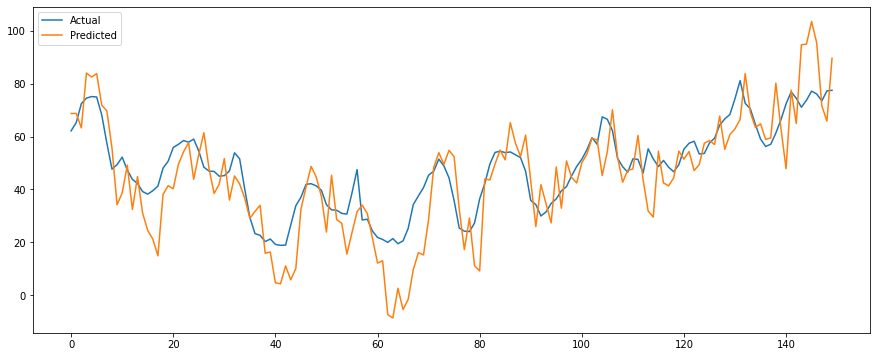

In [ ]:
pd.DataFrame({'Actual':y_test_reg.values[24:],'Predicted':pred_1h_pm25})[:150].plot(figsize=(15,6))

# Second Hour Predictions 

In [ ]:
second_hour = pred(1)

In [ ]:
pred_2h_pm25 = model.predict(second_hour)

In [ ]:
r2_score(y_test_reg.values[25:],pred_2h_pm25[:-1])

0.8890947136901168

In [ ]:
np.corrcoef(pred_2h_pm25[:-1],y_test_reg.values[25:])[1,0]

0.946804274012382

In [ ]:
mean_absolute_percentage_error(y_test_reg.values[25:],pred_2h_pm25[:-1])*100

21.215313415041017

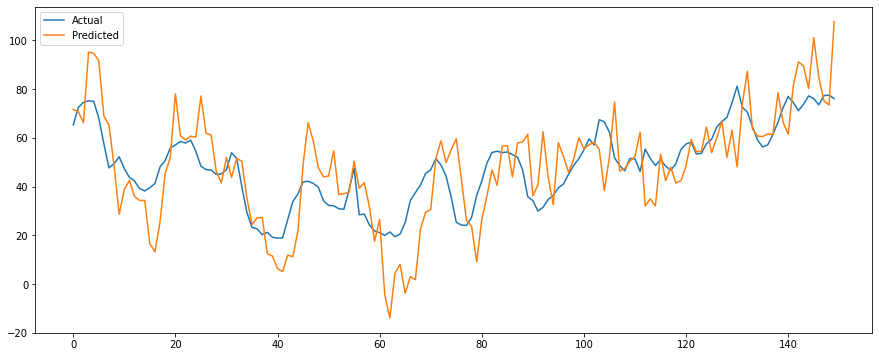

In [ ]:
pd.DataFrame({'Actual':y_test_reg.values[25:],'Predicted':pred_2h_pm25[:-1]})[:150].plot(figsize=(15,6))

# Third Hour Predictions

In [ ]:
third_hour = pred(2)
pred_3h_pm25 = model.predict(third_hour)

In [ ]:
r2_score(y_test_reg.values[26:],pred_3h_pm25[:-2])

0.8317116635095483

In [ ]:
np.corrcoef(pred_3h_pm25[:-2],y_test_reg.values[26:])[1,0]

0.9164293272332896

In [ ]:
mean_absolute_percentage_error(y_test_reg.values[26:],pred_3h_pm25[:-2])*100

25.53613623176738

# Fourth Hour Predictions

In [ ]:
pred_4h_pm25 = model.predict(pred(3))

In [ ]:
r2_score(y_test_reg.values[27:],pred_4h_pm25[:-3])

0.7681162508997472

In [ ]:
np.corrcoef(pred_4h_pm25[:-3],y_test_reg.values[27:])[1,0]

0.8821136299160683

In [ ]:
mean_absolute_percentage_error(y_test_reg.values[27:],pred_4h_pm25[:-3])*100

30.214746188350745

# Fifth Hour Predictions

In [ ]:
pred_5h_pm25 = model.predict(pred(4))

In [ ]:
r2_score(y_test_reg.values[28:],pred_5h_pm25[:-4])

0.7095383804725669

In [ ]:
np.corrcoef(pred_5h_pm25[:-4],y_test_reg.values[28:])[1,0]

0.849768121081477

In [ ]:
mean_absolute_percentage_error(y_test_reg.values[28:],pred_5h_pm25[:-4])*100

33.75566744269733

# Sixth Hour Predictions

In [ ]:
pred_6h_pm25 = model.predict(pred(5))

In [ ]:
r2_score(y_test_reg.values[29:],pred_6h_pm25[:-5])

0.6580222545648688

In [ ]:
np.corrcoef(pred_6h_pm25[:-5],y_test_reg.values[29:])[1,0]

0.820778472863212

In [ ]:
mean_absolute_percentage_error(pred_6h_pm25[:-5],y_test_reg.values[29:])*100

30.411621903534808